In [1]:
from keras import layers
from keras import models
import tensorflow as tf


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [5]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../../input/cats_and_dogs_small/train'
validation_dir = '../../input/cats_and_dogs_small/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, label_batch in train_generator:
    print('data batch size:', data_batch.shape)
    print('labels batch shape:', label_batch.shape)
    break


data batch size: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=100,
                              epochs=30, validation_data=validation_generator,
                              validation_steps=50)


/home/ma/.bin/anaconda3/envs/tensor/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 19s 94ms/step - loss: 0.6977 - acc: 0.5054 - val_loss: 0.9086 - val_acc: 0.0120
Epoch 2/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6639 - acc: 0.6218 - val_loss: 0.8450 - val_acc: 0.3100
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6082 - acc: 0.6771 - val_loss: 0.9781 - val_acc: 0.3100
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5613 - acc: 0.7155 - val_loss: 0.8299 - val_acc: 0.5130
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5396 - acc: 0.7267 - val_loss: 0.7759 - val_acc: 0.5670
Epoch 6/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5260 - acc: 0.7294 - val_loss: 1.0598 - val_acc: 0.4110
Epoch 7/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5012 - acc: 0.7487 - val_loss: 1.2377 - val_acc: 0.3880
Epoch 8/30
100/100 [==============================] - 6s 65ms/step -

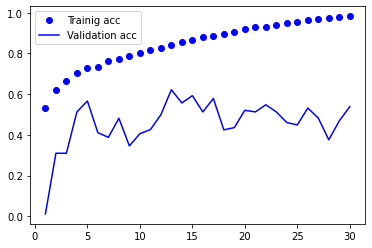

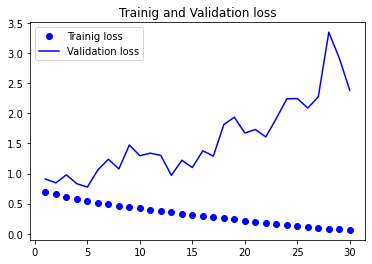

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Trainig loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Trainig and Validation loss")
plt.legend()


In [10]:
history.history

{'loss': [0.6894469261169434,
  0.6512455940246582,
  0.6010559797286987,
  0.5600624680519104,
  0.5384685397148132,
  0.5213269591331482,
  0.487648069858551,
  0.4611509442329407,
  0.4467852711677551,
  0.4196784496307373,
  0.3979777991771698,
  0.3603575825691223,
  0.3488762676715851,
  0.32405465841293335,
  0.300810843706131,
  0.2823368012905121,
  0.25685200095176697,
  0.23080848157405853,
  0.21913254261016846,
  0.19469855725765228,
  0.17993271350860596,
  0.1598513424396515,
  0.14014747738838196,
  0.12427210062742233,
  0.10967160016298294,
  0.09561140090227127,
  0.0865008756518364,
  0.07216749340295792,
  0.058487098664045334,
  0.05541302263736725],
 'acc': [0.546500027179718,
  0.6215000152587891,
  0.6804999709129333,
  0.718500018119812,
  0.7315000295639038,
  0.7444999814033508,
  0.7574999928474426,
  0.7774999737739563,
  0.7854999899864197,
  0.8125,
  0.8289999961853027,
  0.8399999737739563,
  0.8489999771118164,
  0.859000027179718,
  0.874499976634979